# Machine Learning Model building step by step guide

## Data Preprocessing

### 1) Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Set Working Directory

In [6]:
import os 
os.chdir(r'C:\Users\Deepak.Monga\Documents\udemy\ML\Machine Learning A-Z New\Part 1 - Data Preprocessing\Section 2 -------------------- Part 1 - Data Preprocessing --------------------')

### 2) Importing Datasets

In [13]:
# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values


Checking Dataset Shape and dtypes

In [9]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


### 3) Missing Value Treatment

In [12]:
dataset.isnull().sum()

# Age and Salary is missing it is a numerical data so we will replace by mean if data has no outlier else with median

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [15]:
# Taking care of missing data for numerical features

# older version of imputer
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# examples of strategy  ===== median , most_frequent , constant

# to replace the variable with max count
#df = df.fillna(df['col_name'].value_counts().index[0])

imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

### 4) Categorical Data treatment

A) Visualizing the category

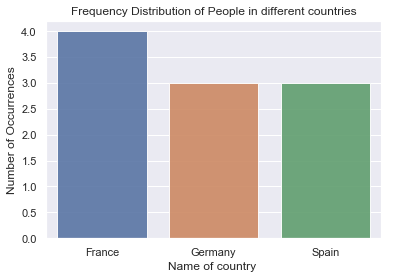

In [21]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = dataset['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of People in different countries')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Name of country ', fontsize=12)
plt.show()

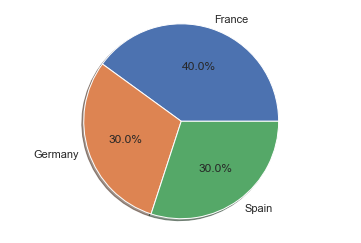

In [23]:
# Using pie chart

labels = dataset['Country'].astype('category').cat.categories.tolist()
counts = dataset['Country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### Step-1 replacing values using dictionary

In [27]:
# Manual Way
replace_map = {'Country': {'France': 1, 'Germany': 2, 'Spain': 3}}

# Dictionary comprehension
labels = dataset['Country'].astype('category').cat.categories.tolist()
replace_map_comp = {'Country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Country': {'France': 1, 'Germany': 2, 'Spain': 3}}


### Use the replace() function on the DataFrame by passing the mapping dictionary as argument

In [40]:
dataset_copy1 = dataset.copy()
dataset_copy1.replace(replace_map_comp, inplace=True)
dataset_copy1['Country'] = dataset_copy['Country'].astype('category')

print(dataset_copy1.head())
print("\n")
print("categorical variable is mapped into numeric")
print("\n")
dataset_copy1.info()

  Country   Age   Salary Purchased
0       1  44.0  72000.0        No
1       3  27.0  48000.0       Yes
2       2  30.0  54000.0        No
3       3  38.0  61000.0        No
4       2  40.0      NaN       Yes


categorical variable is mapped into numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null category
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: category(1), float64(2), object(1)
memory usage: 434.0+ bytes


### 2) Step-2 Label Encoding

In [44]:
dataset_copy2 = dataset.copy()
dataset_copy2['Country'] = dataset_copy2['Country'].astype('category')
dataset_copy2['Country'] = dataset_copy2['Country'].cat.codes
dataset_copy2.info()
dataset_copy2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null int8
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), int8(1), object(1)
memory usage: 330.0+ bytes


,Country,Age,Salary,Purchased
0,0,44.0,72000.0,No
1,2,27.0,48000.0,Yes
2,1,30.0,54000.0,No
3,2,38.0,61000.0,No
4,1,40.0,NaN,Yes


### Step-3 Lable encoder inbulit

In [18]:
# Encoding categorical data
# IF categorial variable is Ordinal then Label encoding is required else using one hot encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
#X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\Deepak.Monga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak.Monga\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Step-4 One hot encoding     

In [48]:
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['Country'], prefix = ['country'] ,drop_first=True)
print(dataset_onehot.head())

    Age   Salary Purchased  country_Germany  country_Spain
0  44.0  72000.0        No                0              0
1  27.0  48000.0       Yes                0              1
2  30.0  54000.0        No                1              0
3  38.0  61000.0        No                0              1
4  40.0      NaN       Yes                1              0
